# Exercise: Shortest $s$-$t$-path 
<font color='blue'><b>Goal:</b></font>
Computing the $s$-$t$ distance through linear programming.

<font color='blue'><b>Required packages:</b></font>`pulp`, `networkx`, `random`, `matplotlib`

We are given a directed graph $G=(V,A)$ with arc lengths $\ell: A \to \mathbb{Z}_{\geq 0}$, and two distinct vertices $s,t\in V$. Our goal is to compute the $s$-$t$ distance $\mathrm{d}(s,t)$, i.e., the distance from $s$ to $t$ in $G$, which is defined by

\begin{equation*}
\mathrm{d}(s,t) := \min\left\{\sum_{a\in P} \ell(a) : \text{ $P\subseteq A$, $P$ is an $s$-$t$ path in $G$}  \right\}\enspace.
\end{equation*}

To achieve this, let us use linear programming!

## Toy example instance

Let us start with an easy example. For your convenience, we created a module `shortestPath_module`, which includes some functionality for generating and drawing graphs. Execute the code below to generate and plot a toy example instance. Find a shortest $s$-$t$-path manually!

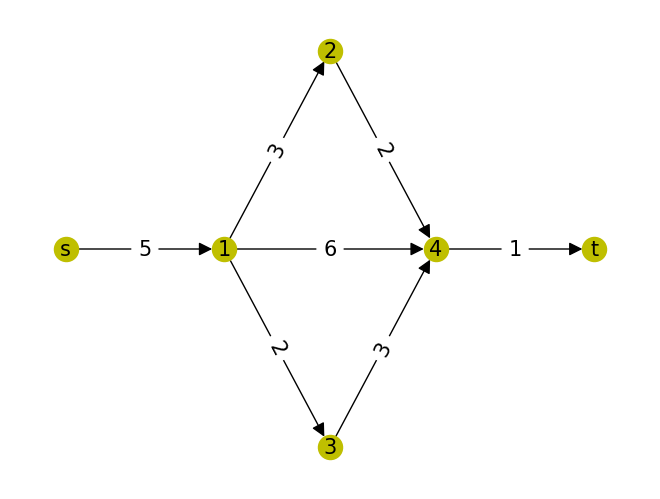

In [1]:
# Import the module
import shortestPath_module as helpers
%matplotlib inline

# Generates and plots example graph
G = helpers.toy_example()
helpers.draw(G)

## An LP-approach

Consider the linear programming formulation seen in class, namely

$$
\begin{array}{rrcll}
\max & d_t \\
     & d_s & = & 0 \\
     & d_v & \leq & d_u + \ell(a) & \forall a=(u,v)\in A \\
     & d_v & \geq & 0 & \forall v\in V\enspace.
\end{array}
$$

Recall that it is proved in the script that the optimal value of the above linear program is indeed equal to the distance $\mathrm{d}(s,t)$. Check the script for all details!

<font color='blue'><b>Your task:</b></font> 

Implement this method to find $\mathrm{d}(s,t)$ via the above linear program in a function

    def distanceSToT(G)

where $G$ is a directed graph as shown in the toy example above. For your implementation, you can assume that `G.nodes` contains two distinct nodes `"s"` and `"t"` and that edges in `G.edges` have an attribute named `"length"` storing the edge length. The function should return the distance $\mathrm{d}(s,t)$ from $s$ to $t$.
      


In [4]:
from pulp import *
import networkx as nx

def distanceSToT(G : nx.DiGraph):
    # IMPLEMENT YOUR FUNCTION HERE
    # empty LP
    sp_LP = LpProblem("shortest_path_LP", LpMaximize)

    vertex_vars = {v : LpVariable(str(v), lowBound = 0) for v in G.nodes}
    
    sp_LP += vertex_vars["t"]

    sp_LP += vertex_vars["s"] == 0

    for (u, v) in G.edges:
        sp_LP += vertex_vars[v] <= vertex_vars[u] + G.edges[(u, v)]["length"]

    sp_LP.solve()

    dst = vertex_vars["t"].value()
    return dst

## Testing your implementation

### Check on the toy example

First check on the toy example given above that your procedures computes the correct $s$-$t$ distance by executing the code below. Did you get it right when doing it manually?

In [5]:
helpers.check(distanceSToT, G)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/ssuemer/Desktop/ETH/HS23/lin_comb_opt/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/284278aee66b4c63ac2cce3ca32626b5-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/284278aee66b4c63ac2cce3ca32626b5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 30 RHS
At line 39 BOUNDS
At line 40 ENDATA
Problem MODEL has 8 rows, 6 columns and 15 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-8) rows, 0 (-6) columns and 0 (-15) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 11
After Postsolve, objective 11, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 11 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallcl

### Checks on a random instance

Next, check that your procedure also returns the same $s$-$t$ distance on a randomly generated graph by executing the code below. Note that the generated random graphs might not have an $s$-$t$ path, at all. Just rerun the cell to generate a new one!

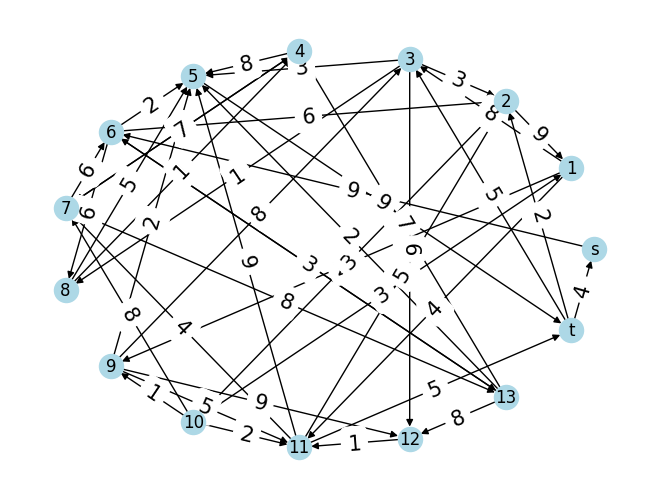

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/ssuemer/Desktop/ETH/HS23/lin_comb_opt/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/c8083490c09f4a63afcb2cc2efd10401-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/c8083490c09f4a63afcb2cc2efd10401-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 48 COLUMNS
At line 135 RHS
At line 179 BOUNDS
At line 180 ENDATA
Problem MODEL has 43 rows, 15 columns and 85 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 31 (-12) rows, 11 (-4) columns and 62 (-23) elements
Perturbing problem by 0.001% of 1 - largest nonzero change 9.4905782e-05 ( 0.0094905782%) - largest zero change 9.3128486e-05
0  Obj -0.00048162947 Dual inf 0.99990409 (1)
10  Obj 19.991737
Optimal - objective value 20
After Postsolve, objective 20, infeasibilities - dual 0 (0), primal 0 (0)
Optimal obje

In [11]:
# Randomly generate G with given number of nodes
G = helpers.random_graph(15)

# Draw G
helpers.draw(G)

# Check the implementation on G
helpers.check(distanceSToT, G)